In [611]:
#dataframes
import pandas as pd

#speedup
import multiprocessing as mp

#suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.TimeSeries = pd.Series 

#math
import numpy as np
import sys
sys.path.append("../")
import odor_stat_calculations as osc


#plots
import pylab as plt
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from figurefirst import FigureLayout,mpl_functions
import figurefirst
from mpl_toolkits.axes_grid1 import make_axes_locatable # for colorbar
import seaborn as sns
sns.set_style("whitegrid")
import figurefirst as fifi
from IPython.display import display,SVG

#misc

import time
np.set_printoptions(suppress=True)
import fly_plot_lib.plot as fpl
FS=7


In [612]:
def load():
    layout = fifi.svg_to_axes.FigureLayout('../../Figure2/results_tracking.svg', autogenlayers=True, make_mplfigures=True, hide_layers=[])
    return layout
path="/home/vbl/DataAnalysis/data/simulator/figure/Figure_tracking/"


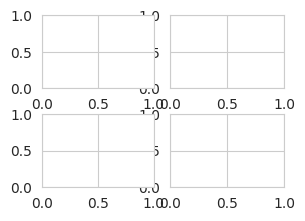

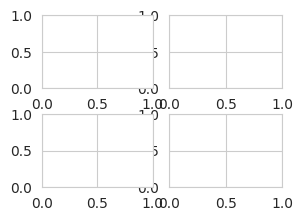

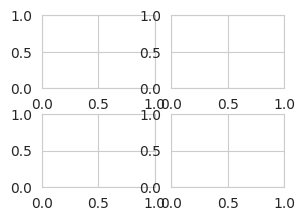

In [613]:
layout = load()

Trajectory 1

In [614]:
osdf = pd.read_hdf(str(path)+'os4.h5')
cfd_df = pd.read_hdf(str(path)+'cfd4.h5')


In [615]:
ax=layout.axes[('fig1','ax1')]
c_map = {"COSMOS": "#bc141a",   #  red
        "CFD":   "#1764ab",     #  blue
        "odor_markers": "black",
        "target": "purple"}  

ax.plot(cfd_df["x"], cfd_df["y"], c=c_map['CFD'], linewidth=2, rasterized=True)
whiff_idx_cfd = np.where(cfd_df["whiff"] == 1)[0]
if len(whiff_idx_cfd) > 0:
    ax.plot(cfd_df["x"].iloc[whiff_idx_cfd], cfd_df["y"].iloc[whiff_idx_cfd],'k*', label='Whiffs', markersize=2, rasterized=True)
    
ax.plot(cfd_df["x"].iloc[0], cfd_df["y"].iloc[0], 'go', markersize=5, label='Start',rasterized=True)
ax.plot(5, 4, 'x', color=c_map["target"], markersize=5, markeredgewidth=2, label='Target', rasterized=True)

# Annotate start point
ax.text(20.3,2.5, f'({cfd_df["x"].iloc[0]:.1f}, {cfd_df["y"].iloc[0]:.1f})', ha='right', va='bottom', color='green', rasterized=True)

# Annotate target point (5,4)
ax.text(5.5, 4.3, "(5,4)", fontsize=8, ha='left', va='top', color='purple',rasterized=True)



ax.set_rasterization_zorder(-20)

# ax.set_ylim(-40,50)
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_yticklabels([])

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../Figure2/results_tracking.svg')

In [616]:
ax=layout.axes[('fig1','ax2')]
c_map = {"COSMOS": "#bc141a",   #  red
        "CFD":   "#1764ab",     #  blue
        "odor_markers": "black",
        "target": "purple"}  

# 2) Left subplot: "mySim" trajectory
ax.plot(osdf["x"], osdf["y"], c=c_map['COSMOS'], linewidth=2, rasterized=True)


whiff_idx_osd = np.where(osdf["whiff"] == 1)[0]
if len(whiff_idx_osd) > 0:
    ax.plot(osdf["x"].iloc[whiff_idx_osd],  osdf["y"].iloc[whiff_idx_osd], 'k*', label='Whiffs', markersize=2,rasterized=True)

ax.plot(osdf["x"].iloc[0], osdf["y"].iloc[0], 'go', markersize=5, label='Start', rasterized=True)
ax.plot(5, 4, 'x', color=c_map["target"], markersize=5, markeredgewidth=2, label='Target', rasterized=True)

# Annotate start point
ax.text(20.3,2.3, f'({osdf["x"].iloc[0]:.1f}, {osdf["y"].iloc[0]:.1f})', ha='right', va='bottom', color='green',rasterized=True)

# Annotate target point (5,4)
ax.text(5.5, 4.3, "(5,4)", fontsize=8, ha='left', va='top', color='purple', rasterized=True)



ax.set_rasterization_zorder(-20)

ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_yticklabels([])

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../Figure2/results_tracking.svg')

In [617]:
ax=layout.axes[('fig1','ax3')]
lim=[5,11]

ax.plot(cfd_df.time, cfd_df.odor, c='#1764ab', rasterized=True)
ax.set_xlim(lim)

whiff_idx = np.where(cfd_df["whiff"] == 1)[0]
if len(whiff_idx)>0:
    ax.plot(cfd_df.time[whiff_idx], cfd_df.odor[whiff_idx], 'k*', markersize=2, label='Detected Whiffs', rasterized=True)

# ax.axhline(6.5,linestyle='--',c='black')

ax.set_rasterization_zorder(-20)

mpl_functions.adjust_spines(ax,['left','bottom'],
                            spine_locations={'left': 5,'bottom': 5}, 
                            smart_bounds=True,
                            xticks=lim,
                            yticks=[0,13],
                            linewidth=0.5)

ax.set_yticklabels(['0','10'])
ax.grid(False)
ax.set_xticklabels([])

ax.set_xlabel('6 seconds')
ax.xaxis.set_label_coords(0.5, -0.15)
ax.set_ylabel('odor, a.u.')
ax.yaxis.set_label_coords(-0.08, 0.5)


figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../Figure2/results_tracking.svg')

In [618]:
ax=layout.axes[('fig1','ax4')]

ax.plot(osdf.time,osdf.odor, c='#bc141a', rasterized=True)
ax.set_xlim(lim)

whiff_idx = np.where(osdf["whiff"] == 1)[0]
if len(whiff_idx)>0:
    ax.plot(osdf.time[whiff_idx], osdf.odor[whiff_idx], 'k*', markersize=2, label='Detected Whiffs', rasterized=True)

# ax.axhline(6.5,linestyle='--',c='black')

ax.set_rasterization_zorder(-20)

mpl_functions.adjust_spines(ax,['bottom'],
                            spine_locations={'left': 5,'bottom': 5}, 
                            smart_bounds=True,
                            xticks=lim,
                            yticks=[0,10],
                            linewidth=0.5)

ax.set_xticklabels([])
ax.grid(False)
# ax.set_xlabel('6 seconds')
ax.xaxis.set_label_coords(0.5, -0.15)


figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../Figure2/results_tracking.svg')

Trajectory 2

In [619]:
osdf = pd.read_hdf(str(path)+'os8.h5')
cfd_df = pd.read_hdf(str(path)+'cfd8.h5')
osdf.x[2178]=5
osdf.y[2178]=4
cfd_df.x[1801]=5
cfd_df.y[1801]=4


In [620]:
ax=layout.axes[('fig2','ax5')]
c_map = {"COSMOS": "#bc141a",   #  red
        "CFD":   "#1764ab",     #  blue
        "odor_markers": "black",
        "target": "purple"}  

ax.plot(cfd_df["x"], cfd_df["y"], c=c_map['CFD'], linewidth=2, rasterized=True)
whiff_idx_cfd = np.where(cfd_df["whiff"] == 1)[0]
if len(whiff_idx_cfd) > 0:
    ax.plot(cfd_df["x"].iloc[whiff_idx_cfd], cfd_df["y"].iloc[whiff_idx_cfd], 'k*', label='Whiffs', markersize=2, rasterized=True)

ax.plot(cfd_df["x"].iloc[0], cfd_df["y"].iloc[0], 'go', markersize=5, label='Start',rasterized=True)
ax.plot(5, 4, 'x', color=c_map["target"], markersize=5, markeredgewidth=2, label='Target', rasterized=True)

# Annotate start point
ax.text(7.2,3.85, f'({cfd_df["x"].iloc[0]:.1f}, {cfd_df["y"].iloc[0]:.1f})', ha='right', va='bottom', color='green', rasterized=True)

# Annotate target point (5,4)
ax.text(5.04, 4, "(5,4)", fontsize=8, ha='left', va='top', color='purple',rasterized=True)



ax.set_rasterization_zorder(-20)

# ax.set_ylim(-40,50)
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_yticklabels([])

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../Figure2/results_tracking.svg')

In [621]:
ax=layout.axes[('fig2','ax6')]
c_map = {"COSMOS": "#bc141a",   #  red
        "CFD":   "#1764ab",     #  blue
        "odor_markers": "black",
        "target": "purple"}  

# 2) Left subplot: "mySim" trajectory
ax.plot(osdf["x"], osdf["y"], c=c_map['COSMOS'], linewidth=2, rasterized=True)
whiff_idx_osd = np.where(osdf["whiff"] == 1)[0]
if len(whiff_idx_osd) > 0:
    ax.plot(osdf["x"].iloc[whiff_idx_osd],  osdf["y"].iloc[whiff_idx_osd], 'k*', label='Whiffs', markersize=2,rasterized=True)

ax.plot(osdf["x"].iloc[0], osdf["y"].iloc[0], 'go', markersize=5, label='Start', rasterized=True)
ax.plot(5, 4, 'x', color=c_map["target"], markersize=5, markeredgewidth=2, label='Target', rasterized=True)

# Annotate start point
ax.text(7.2,4.1, f'({osdf["x"].iloc[0]:.1f}, {osdf["y"].iloc[0]:.1f})', ha='right', va='bottom', color='green',rasterized=True)

# Annotate target point (5,4)
ax.text(5, 4.1, "(5,4)", fontsize=8, ha='left', va='top', color='purple', rasterized=True)



ax.set_rasterization_zorder(-20)

ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_yticklabels([])

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../Figure2/results_tracking.svg')

In [622]:
ax=layout.axes[('fig2','ax7')]
lim=[0,6]

ax.plot(cfd_df.time, cfd_df.odor, c='#1764ab', rasterized=True)
ax.set_xlim(lim)

whiff_idx = np.where(cfd_df["whiff"] == 1)[0]
if len(whiff_idx)>0:
    ax.plot(cfd_df.time[whiff_idx], cfd_df.odor[whiff_idx], 'k*', markersize=2, label='Detected Whiffs', rasterized=True)

ax.grid(False)
ax.set_rasterization_zorder(-20)

mpl_functions.adjust_spines(ax,['left','bottom'],
                            spine_locations={'left': 5,'bottom': 5}, 
                            smart_bounds=True,
                            xticks=lim,
                            yticks=[0,15],
                            linewidth=0.5)

ax.spines['left'].set_visible(False)
ax.set_yticks([]) 
ax.set_xticklabels([])

# ax.set_xlabel('6 seconds')
ax.xaxis.set_label_coords(0.5, -0.15)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../Figure2/results_tracking.svg')

In [623]:
ax=layout.axes[('fig2','ax8')]

ax.plot(osdf.time,osdf.odor, c='#bc141a', rasterized=True)
ax.set_xlim(lim)

whiff_idx = np.where(osdf["whiff"] == 1)[0]
if len(whiff_idx)>0:
    ax.plot(osdf.time[whiff_idx], osdf.odor[whiff_idx], 'k*', markersize=2, label='Detected Whiffs', rasterized=True)

ax.grid(False)
ax.set_rasterization_zorder(-20)

mpl_functions.adjust_spines(ax,['bottom'],
                            spine_locations={'left': 5,'bottom': 5}, 
                            smart_bounds=True,
                            xticks=lim,
                            yticks=[0,10],
                            linewidth=0.5)

ax.set_xticklabels([])
# ax.set_xlabel('6 seconds')
ax.xaxis.set_label_coords(0.5, -0.15)


figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../Figure2/results_tracking.svg')

Trajectory 3

In [624]:
osdf = pd.read_hdf(str(path)+'os1.h5')
cfd_df = pd.read_hdf(str(path)+'cfd1.h5')
# osdf.x[2506]=5
# osdf.y[2506]=4
# cfd_df.x[1801]=5
# cfd_df.y[1801]=4

In [625]:
ax=layout.axes[('fig3','ax9')]
c_map = {"COSMOS": "#bc141a",   #  red
        "CFD":   "#1764ab",     #  blue
        "odor_markers": "black",
        "target": "purple"}  

ax.plot(cfd_df["x"][:-1], cfd_df["y"][:-1], c=c_map['CFD'], linewidth=2, rasterized=True)

whiff_idx_cfd = np.where(cfd_df["whiff"] == 1)[0]
if len(whiff_idx_cfd) > 0:
    ax.plot(cfd_df["x"].iloc[whiff_idx_cfd], cfd_df["y"].iloc[whiff_idx_cfd], 'k*', label='Whiffs', markersize=2, rasterized=True)
    
ax.plot(cfd_df["x"].iloc[0], cfd_df["y"].iloc[0], 'go', markersize=5, label='Start',rasterized=True)
ax.plot(5, 4, 'x', color=c_map["target"], markersize=5, markeredgewidth=2, label='Target', rasterized=True)

# Annotate start point
ax.text(8.2,6.1, f'({cfd_df["x"].iloc[0]:.1f}, {cfd_df["y"].iloc[0]:.1f})', ha='right', va='bottom', color='green', rasterized=True)

# Annotate target point (5,4)
ax.text(5.2, 4.2, "(5,4)", fontsize=8, ha='left', va='top', color='purple',rasterized=True)



ax.set_rasterization_zorder(-20)

# ax.set_ylim(-40,50)
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_yticklabels([])

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig3'], 'fig3', cleartarget=True)
layout.write_svg('../../Figure2/results_tracking.svg')

In [626]:
ax=layout.axes[('fig3','ax10')]
c_map = {"COSMOS": "#bc141a",   #  red
        "CFD":   "#1764ab",     #  blue
        "odor_markers": "black",
        "target": "purple"}  


# 2) Left subplot: "mySim" trajectory
ax.plot(osdf["x"][:-1], osdf["y"][:-1], c=c_map['COSMOS'], linewidth=2, rasterized=True)

whiff_idx_osd = np.where(osdf["whiff"] == 1)[0]
if len(whiff_idx_osd) > 0:
    ax.plot(osdf["x"].iloc[whiff_idx_osd],
            osdf["y"].iloc[whiff_idx_osd],
            'k*', label='Whiffs', markersize=2,rasterized=True)

ax.plot(osdf["x"].iloc[0], osdf["y"].iloc[0], 'go', markersize=5, label='Start', rasterized=True)
ax.plot(5, 4, 'x', color=c_map["target"], markersize=5, markeredgewidth=2, label='Target', rasterized=True)

# Annotate start point
ax.text(8.2, 6.1, f'({osdf["x"].iloc[0]:.1f}, {osdf["y"].iloc[0]:.1f})', ha='right', va='bottom', color='green',rasterized=True)

# Annotate target point (5,4)
ax.text(5.2, 4.2, "(5,4)", fontsize=8, ha='left', va='top', color='purple', rasterized=True)



ax.set_rasterization_zorder(-20)

ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_yticklabels([])

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig3'], 'fig3', cleartarget=True)
layout.write_svg('../../Figure2/results_tracking.svg')

In [627]:
ax=layout.axes[('fig3','ax11')]
lim=[0,6]

ax.plot(cfd_df.time, cfd_df.odor, c='#1764ab', rasterized=True)
ax.set_xlim(lim)

whiff_idx = np.where(cfd_df["whiff"] == 1)[0]
if len(whiff_idx)>0:
    ax.plot(cfd_df.time[whiff_idx], cfd_df.odor[whiff_idx], 'k*', markersize=2, label='Detected Whiffs', rasterized=True)

ax.grid(False)
ax.set_rasterization_zorder(-20)

mpl_functions.adjust_spines(ax,['left','bottom'],
                            spine_locations={'left': 5,'bottom': 5}, 
                            smart_bounds=True,
                            xticks=lim,
                            yticks=[0,13],
                            linewidth=0.5)


ax.spines['left'].set_visible(False)
ax.set_yticks([]) 
ax.set_xticklabels([])
# ax.set_xlabel('6 seconds')
ax.xaxis.set_label_coords(0.5, -0.15)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig3'], 'fig3', cleartarget=True)
layout.write_svg('../../Figure2/results_tracking.svg')

In [628]:
ax=layout.axes[('fig3','ax12')]

ax.plot(osdf.time,osdf.odor, c='#bc141a', rasterized=True)
ax.set_xlim(lim)

whiff_idx = np.where(osdf["whiff"] == 1)[0]
if len(whiff_idx)>0:
    ax.plot(osdf.time[whiff_idx], osdf.odor[whiff_idx], 'k*', markersize=2, label='Detected Whiffs', rasterized=True)

# ax.axhline(6.5,linestyle='--',c='black')

ax.set_rasterization_zorder(-20)

mpl_functions.adjust_spines(ax,['bottom'],
                            spine_locations={'left': 5,'bottom': 5}, 
                            smart_bounds=True,
                            xticks=lim,
                            yticks=[0,10],
                            linewidth=0.5)

ax.set_xticklabels([])
ax.grid(False)
# ax.set_xlabel('6 seconds')
ax.xaxis.set_label_coords(0.5, -0.15)


figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig3'], 'fig3', cleartarget=True)
layout.write_svg('../../Figure2/results_tracking.svg')